In [42]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [43]:
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
train = pd.read_csv('data/train_dataset.csv')
shops = pd.read_csv('data/shops.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test_dataset.csv')

In [44]:
item_categories = item_categories.set_index(item_categories.item_category_id).drop('item_category_id', axis=1)
items = items.set_index(items.item_id).drop('item_id', axis=1)
items['item_category_name'] = item_categories.loc[items['item_category_id'].array].item_category_name.array
shops = shops.set_index(shops.shop_id).drop('shop_id', axis=1)

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
0,2013-01-01,0,18,5823,2500.0,1.0,35,2500.0,0,0
1,2013-01-01,0,27,5573,849.0,1.0,2,849.0,0,0
2,2013-01-01,0,7,1006,399.0,1.0,67,399.0,0,0
3,2013-01-01,0,19,17707,899.0,1.0,19,899.0,0,0
4,2013-01-01,0,14,19548,149.0,1.0,40,149.0,0,0


In [45]:
item_id = 20949
shop_id = 28
some_item_in_shop = train[(train.item_id == item_id) & (train.shop_id == shop_id)]

In [57]:
week_info = some_item_in_shop.groupby('weeks').agg({'item_cnt_day': 'sum', 'total_income': 'sum'})
series = week_info.item_cnt_day

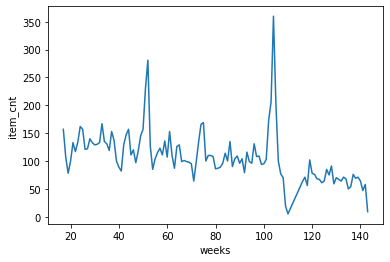

In [76]:
plt.plot(series)
plt.xlabel('weeks')
plt.ylabel('item_cnt')
plt.show()

In [48]:
month_info = some_item_in_shop.groupby('date_block_num').agg({'item_cnt_day': 'sum', 'total_income': 'sum'})

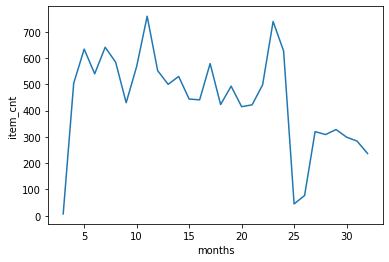

In [77]:
plt.plot(month_info.item_cnt_day)
plt.xlabel('months')
plt.ylabel('item_cnt')
plt.show()

In [52]:
import statsmodels.api as sm

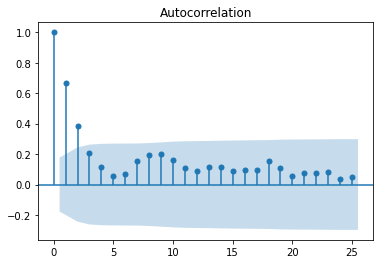

In [75]:
sm.graphics.tsa.plot_acf(series, lags=25);

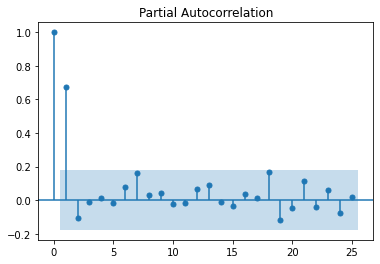

In [60]:
fig = sm.graphics.tsa.plot_pacf(series, lags=25);

In [84]:
test = sm.tsa.adfuller(month_info.item_cnt_day)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -3.647941465947644
p-value:  0.0049079309820174565
Critical values:  {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}
единичных корней нет, ряд стационарен


In [71]:
test = sm.tsa.adfuller(some_item_in_shop.item_cnt_day)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -4.070097566413183
p-value:  0.0010848179356620102
Critical values:  {'1%': -3.438399099271788, '5%': -2.8650928286782857, '10%': -2.568661836350634}
единичных корней нет, ряд стационарен


In [66]:
test = sm.tsa.adfuller(series)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -4.523044867398955
p-value:  0.0001786217885650731
Critical values:  {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}
единичных корней нет, ряд стационарен


In [69]:
p, d, q = 2, 1, 1
model = sm.tsa.ARIMA(week_info.item_cnt_day, order=(p, d, q)).fit(full_output=False, disp=0)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsuppo

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.item_cnt_day   No. Observations:                  121
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -593.743
Method:                       css-mle   S.D. of innovations             32.212
Date:                Fri, 10 Sep 2021   AIC                           1197.486
Time:                        10:01:18   BIC                           1211.465
Sample:                             1   HQIC                          1203.163
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6459      0.177     -3.646      0.000      -0.993      -0.299
ar.L1.D.item_cnt_day     0.7246      0.090      8.007      0.000       0.547       0.902
ar.L2.D.item_cnt_day    -0.1842      0.090     -2.036      0.042      -0.362      -0.007
ma.L1.D.item_cnt_day    -1.0000      0.027    -37.029      0.000      -1.053      -0.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9665           -1.2492j            2.3298           -0.0901
AR.2            1.9665           +1.2492j            2.3298            0.0901
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
def EMA(y, alpha):
    y_predict = 0
    for y_curr in y:
        y_predict = (1 - alpha) * y_predict + alpha * y_curr
    y_prev = y_curr
    while True:
        yield y_predict
        y_prev, y_predict = y_predict, (1 - alpha) * y_predict + alpha * y_prev

In [106]:
ema = EMA(month_info.item_cnt_day, 0.3)

In [107]:
forecast = next(ema)

In [108]:
forecast

283.6554366458727

In [99]:
test[(test.shop_id == shop_id) & (test.item_id == item_id)].item_cnt_day.sum()

229.0

In [110]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
0,2013-01-01,0,18,5823,2500.0,1.0,35,2500.0,0,0
1,2013-01-01,0,27,5573,849.0,1.0,2,849.0,0,0
2,2013-01-01,0,7,1006,399.0,1.0,67,399.0,0,0
3,2013-01-01,0,19,17707,899.0,1.0,19,899.0,0,0
4,2013-01-01,0,14,19548,149.0,1.0,40,149.0,0,0
